# All the President's Moods

During his tenure as US President, Donald Trump maintained a steady presence on Twitter. Since the words of the politicians tend to affect the behavior of other people, including markets, there is a sizable literature quantifying the effect of politician speeches on market behavior in the aggregate. 

Unllke other politicians, Trump's tweets were both impassioned and plentiful. This means Twitter can give a large volume of reactions to work with that have a distribution of "sentiment."

In this assignment:
1. (2 points) Load a json file of all the president's tweets from August 30 to November 5th. After loading them, put the following information into a dataframe:
    - The full text of the Tweet. (string)
    - Any users mentioned in the Tweet. (string)
    - The timestamp. (datetime)
    - The date (YYYY-MM-DD) of the Tweet. (date)
    - Retweets (numeric)
    - Favorites (numeric)
    - Whether the Tweet was censored, meaning zero retweets (binary/boolean).
    
   __Hint: list comprehensions can be your best friend!__
   
2. (2 points) Create a "clean_text" column by doing the following to "full_text":
    - removing links, which are strings that start with "http"
    - removing hashtags, which are strings that start with "#"
    - removing mentions, which are strings that start with "@"
    - converting text to lower case.
    - removing punctuation.
    
   Now report:
    - The top 10 most common words (omitting stop words).
    - The top 5 Twitter accounts that are mentioned.
    - The top 5 most liked ("favorited") tweets.
    - The top 5 hashtags (hint: use a regular expression).
3. (4 points) Graph the daily volme of tweets over time, while annotating any major events.
4. (6 points) Run the tweets through sentiment analysis, and report:
    - The 20 most "negative" and "positive" words.
    - A graph of the sentiment over time.
    
5. (6 points) Trump and the Stock Market
    - Read in the time series dataset of S&P 500 closing, daily prices. Then merge this data to Trump's daily sentiment scores. __Graph both of them (EXTRA CREDIT GRAPH)__, calculate their correlation, and interpret what you see.

    - Since Trump often comments on the stock market but the stock market may also react to his tweets, it is not clear how the causal relationship should work. Describe in detail how you would answer the question: "Did President Trump's tweet sentiment influence the stock market?" Specifically describe:
        - The data you would need in addition to these data sources.
        - The way you would read in the data and manipulate it.
        - The sort of analysis or statistics you would calculate to answer the question.
    

In [1]:
import pandas as pd
import json 
import matplotlib.pyplot as plt
import matplotlib
import re
import string
import regex
import nltk
nltk.download("stopwords")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isaacwerries/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Number 1

In [4]:
tweets_df = pd.read_json('/Users/isaacwerries/Desktop/test/Trump_tweets.json') #open json file
pd.set_option('display.max_columns', None) #show all columns

In [5]:
tweets_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,extended_entities,withheld_scope,withheld_copyright,withheld_in_countries
0,2020-11-05 15:37:40+00:00,1324375334653988864,1324375334653988864,Fmr NV AG Laxalt: ‘No Question‘ Trump Would Ha...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,27745,124472,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-05 15:09:19+00:00,1324368202139357186,1324368202139357184,ANY VOTE THAT CAME IN AFTER ELECTION DAY WILL ...,False,"[0, 61]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-05 14:12:37+00:00,1324353932022480896,1324353932022480896,STOP THE COUNT!,False,"[0, 15]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,120833,750449,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-05 00:01:07+00:00,1324139647111409667,1324139647111409664,"Detroit Absentee Ballot Counting Chaos, Blocke...",False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,71580,249948,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-05 00:00:05+00:00,1324139387546984449,1324139387546984448,Demands Arise for PA Attorney General to ‘Step...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,44496,172668,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,2020-09-23 02:28:39+00:00,1308594096005697541,1308594096005697536,Our GREAT RALLY tonight in Pennsylvania. Treme...,False,"[0, 65]","{'hashtags': [{'text': 'MAGA', 'indices': [60,...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,39427,183462,False,False,0.0,en,NaN,NaN,NaN,NaN,"{'media': [{'id': 1308594089575821313, 'id_str...",NaN,NaN,NaN
3014,2020-09-23 01:43:48+00:00,1308582808181329922,1308582808181329920,"With your VOTE, we are going to lift our natio...",False,"[0, 267]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,18921,65614,False,False,0.0,en,NaN,NaN,NaN,NaN,"{'media': [{'id': 1308582783946616833, 'id_str...",NaN,NaN,NaN
3015,2020-09-23 01:30:28+00:00,1308579452100599808,1308579452100599808,I did more in 47 months than Joe Biden did in ...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,27660,129266,False,False,0.0,en,NaN,NaN,NaN,NaN,"{'media': [{'id': 1308555064722763777, 'id_str...",NaN,NaN,NaN
3016,2020-09-23 01:30:02+00:00,1308579343333900288,1308579343333900288,https://t.co

In [6]:
mod_df = tweets_df.loc[:,('full_text','entities','retweet_count','favorite_count')]
mod_df['censored'] = tweets_df['retweet_count'] == 0
mod_df['timestamp'] = tweets_df['created_at']
mod_df['date'] = tweets_df['created_at'].dt.strftime('%Y-%m-%d')

In [7]:
mod_df.head(5)

,full_text,entities,retweet_count,favorite_count,censored,timestamp,date
0,Fmr NV AG Laxalt: ‘No Question‘ Trump Would Ha...,"{'hashtags': [], 'symbols': [], 'user_mentions...",27745,124472,False,2020-11-05 15:37:40+00:00,2020-11-05
1,ANY VOTE THAT CAME IN AFTER ELECTION DAY WILL ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,True,2020-11-05 15:09:19+00:00,2020-11-05
2,STOP THE COUNT!,"{'hashtags': [], 'symbols': [], 'user_mentions...",120833,750449,False,2020-11-05 14:12:37+00:00,2020-11-05
3,"Detroit Absentee Ballot Counting Chaos, Blocke...","{'hashtags': [], 'symbols': [], 'user_mentions...",71580,249948,False,2020-11-05 00:01:07+00:00,2020-11-05
4,Demands Arise for PA Attorney General to ‘Step...,"{'hashtags': [], 'symbols': [], 'user_mentions...",44496,172668,False,2020-11-05 00:00:05+00:00,2020-11-05


In [8]:
print(mod_df.dtypes)

full_text                      object
entities                       object
retweet_count                   int64
favorite_count                  int64
censored                         bool
timestamp         datetime64[ns, UTC]
date                           object
dtype: object


# Number 2

In [9]:
mod_df['clean_text'] = mod_df['full_text'].str.lower() #convert to lowercase
mod_df['clean_text'] = [re.sub(r'@\w+',"",x) for x in mod_df['clean_text']] #remove all @
mod_df['clean_text'] = [re.sub(r'#\w+',"",x) for x in mod_df['clean_text']] #remove all hashtags
mod_df['clean_text'] = [re.sub(r'http\S+',"",x) for x in mod_df['clean_text']] #remove all links
mod_df['clean_text'] = [re.sub(r'[^\w\s]',"",x) for x in mod_df['clean_text']] #remove punctuation
mod_df['clean_text'] = [re.sub(r'\n'," ",x) for x in mod_df['clean_text']]
mod_df['clean_text'] = [re.sub(r'\r'," ",x) for x in mod_df['clean_text']]
mod_df = mod_df.drop_duplicates(subset = ['clean_text'], keep = 'first') #remove diplicates
mod_df = mod_df[mod_df['clean_text'] != ''] #remove blanks

In [10]:
mod_df

,full_text,entities,retweet_count,favorite_count,censored,timestamp,date,clean_text
0,Fmr NV AG Laxalt: ‘No Question‘ Trump Would Ha...,"{'hashtags': [], 'symbols': [], 'user_mentions...",27745,124472,False,2020-11-05 15:37:40+00:00,2020-11-05,fmr nv ag laxalt no question trump would have ...
1,ANY VOTE THAT CAME IN AFTER ELECTION DAY WILL ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,True,2020-11-05 15:09:19+00:00,2020-11-05,any vote that came in after election day will ...
2,STOP THE COUNT!,"{'hashtags': [], 'symbols': [], 'user_mentions...",120833,750449,False,2020-11-05 14:12:37+00:00,2020-11-05,stop the count
3,"Detroit Absentee Ballot Counting Chaos, Blocke...","{'hashtags': [], 'symbols': [], 'user_mentions...",71580,249948,False,2020-11-05 00:01:07+00:00,2020-11-05,detroit absentee ballot counting chaos blocked...
4,Demands Arise for PA Attorney General to ‘Step...,"{'hashtags': [], 'symbols': [], 'user_mentions...",44496,172668,False,2020-11-05 00:00:05+00:00,2020-11-05,demands arise for pa attorney general to step ...
...,...,...,...,...,...,...,...,...
1784,GREAT PATRIOTS! https://t.co/BWGxVoBTmI,"{'hashtags': [], 'symbols': [], 'user_mentions...",28849,139909,False,2020-08-30 10:37:39+00:00,2020-08-30,great patriots
1785,Disgraceful Anarchists. We are watching them c...,"{'hashtags': [], 'symbols': [], 'user_mentions...",20520,68859,False,2020-08-30 10:36:14+00:00,2020-08-30,disgraceful anarchists we are watching them cl...
1786,Democrat “Leadership” has no clue. Request hel...,"{'hashtags': [], 'symbols': [], 'user_mentions...",10607,33582,False,2020-08-30 10:31:53+00:00,2020-08-30,democrat leadership has no clue request help n...
1787,ANTIFA is a Radical Left group that only wants...,"{'hashtags': [], 'symbols': [{'text': 'FOOLS',...",22742,65156,False,2020-08-30 10:28:46+00:00,2020-08-30,antifa is a radical left group that only wants...


In [12]:
words = [x.split(" ") for x in mod_df['clean_text']]
words_list = [pd.Series(x).value_counts() for x in words]
word_df = pd.concat(words_list,axis=1).fillna(0).T
sw_list = stopwords.words('english') + [" ", '']
words_nsw = word_df.loc[:,~word_df.T.index.isin(sw_list)]
top = words_nsw.sum().sort_values(ascending=False)
top.head(10)

biden      294.0
great      249.0
vote       228.0
amp        215.0
joe        208.0
thank      147.0
people     133.0
get        120.0
big        108.0
america     97.0
dtype: float64

In [13]:
ment = mod_df.full_text.str.findall(r'@\w+').explode().value_counts()
ment.head(5)

@BreitbartNews    49
@FoxNews          31
@OANN             10
@CNN               8
@cspan             8
Name: full_text, dtype: int64

In [14]:
hash = mod_df.full_text.str.findall(r'#\w+').explode().value_counts()
hash.head(5)

#MAGA                 106
#VOTE                   7
#2A                     7
#TrumpPence2020         4
#AmericanDreamPlan      2
Name: full_text, dtype: int64

In [15]:
mod_df.sort_values('favorite_count', ascending = False).head(5)

,full_text,entities,retweet_count,favorite_count,censored,timestamp,date,clean_text
1014,"Tonight, @FLOTUS and I tested positive for COV...","{'hashtags': [], 'symbols': [], 'user_mentions...",406603,1858018,False,2020-10-02 04:54:06+00:00,2020-10-02,tonight and i tested positive for covid19 we ...
1012,"Going welI, I think! Thank you to all. LOVE!!!","{'hashtags': [], 'symbols': [], 'user_mentions...",137480,1202110,False,2020-10-03 03:31:34+00:00,2020-10-03,going weli i think thank you to all love
17,WE ARE LOOKING REALLY GOOD ALL OVER THE COUNTR...,"{'hashtags': [], 'symbols': [], 'user_mentions...",109322,957283,False,2020-11-03 23:15:55+00:00,2020-11-03,we are looking really good all over the countr...
16,I will be making a statement tonight. A big WIN!,"{'hashtags': [], 'symbols': [], 'user_mentions...",133170,925883,False,2020-11-04 05:45:53+00:00,2020-11-04,i will be making a statement tonight a big win
24,This Tweet from @realDonaldTrump has been with...,"{'hashtags': [], 'symbols': [], 'user_mentions...",169975,905506,False,2020-11-03 07:57:08+00:00,2020-11-03,this tweet from has been withheld in response...


# Number 3

In [16]:
daily_vol = mod_df.groupby('date').count()
daily_vol

,full_text,entities,retweet_count,favorite_count,censored,timestamp,clean_text
date,,,,,,,
2020-08-30,22,22,22,22,22,22,22
2020-08-31,10,10,10,10,10,10,10
2020-09-01,15,15,15,15,15,15,15
2020-09-02,21,21,21,21,21,21,21
2020-09-03,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...
2020-11-01,39,39,39,39,39,39,39
2020-11-02,52,52,52,52,52,52,52
2020-11-03,25,25,25,25,25,25,25


In [17]:
col = []
for val in daily_vol['clean_text']:
    if val >= 50:
        col.append('red')
    elif val < 10:
        col.append('green')
    else:
        col.append('blue')

Text(58, 53, 'election day')

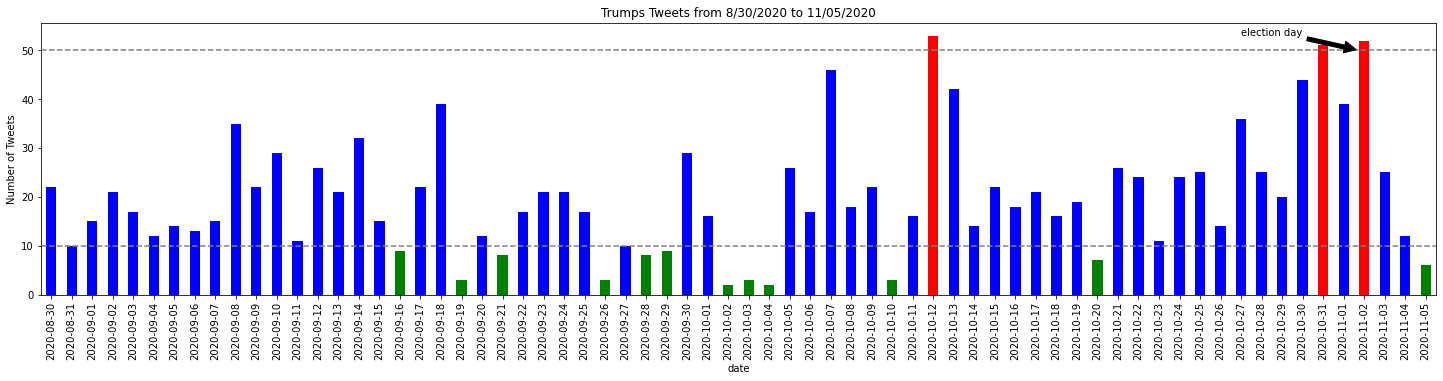

In [18]:
daily_vol['clean_text'].plot(x='date', figsize = (25,5), kind='bar', color=col)
plt.axhline(y=50, color='grey', linestyle = 'dashed' )
plt.axhline(y=10, color='grey', linestyle = 'dashed')
plt.title("Trumps Tweets from 8/30/2020 to 11/05/2020")
plt.ylabel('Number of Tweets')
plt.annotate('election day', xy=(63.75, 50), xytext=(58, 53), arrowprops=dict(facecolor='black', shrink=0.05),)

# Number 4

In [21]:
nltk.download('vader_lexicon')
vader=SentimentIntensityAnalyzer()
top = words_nsw.sum().sort_values(ascending=False).reset_index()
top['sentiment_score'] = [vader.polarity_scores(x)['compound'] for x in top['index']]
top20 = top.sort_values('sentiment_score', ascending = False).head(20)
ntop20 = top.sort_values('sentiment_score', ascending = False).tail(20)
top20

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/isaacwerries/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,index,0,sentiment_score
3643,magnificently,1.0,0.6597
1836,glorious,2.0,0.6369
147,best,23.0,0.6369
264,greatest,14.0,0.6369
510,freedom,8.0,0.6369
214,love,17.0,0.6369
1,great,249.0,0.6249
1915,awesome,2.0,0.6249
1239,outstanding,3.0,0.6124
596,super,7.0,0.5994


In [22]:
ntop20

,index,0,sentiment_score
3110,racism,1.0,-0.6249
192,disaster,18.0,-0.6249
503,terrorists,8.0,-0.6249
1935,hatred,2.0,-0.6369
1148,betray,3.0,-0.6369
941,dead,4.0,-0.6486
2586,murdering,1.0,-0.6486
1879,killer,2.0,-0.6486
1264,devastating,3.0,-0.6486
3998,murdered,1.0,-0.6597


<AxesSubplot:title={'center':"Trump's Tweet Sentiment Score Over Time"}, xlabel='date', ylabel='Sentiment Score'>

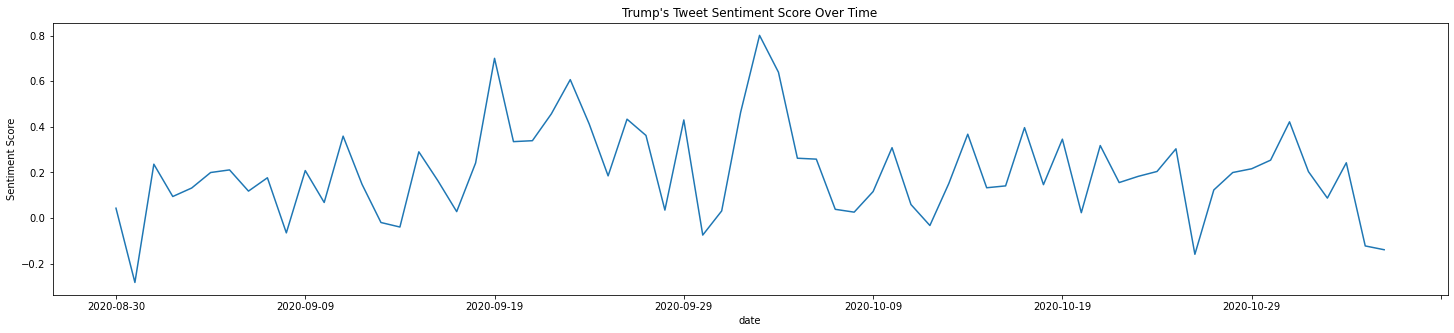

In [26]:
mod_df['sentiment_score'] = [vader.polarity_scores(x)['compound'] for x in mod_df['clean_text']]
splot=mod_df[['sentiment_score','date','clean_text']]
splot.groupby('date').sentiment_score.mean().plot(figsize = (25,5), ylabel = 'Sentiment Score', title = "Trump's Tweet Sentiment Score Over Time")


# Number 5

In [162]:
market_data = pd.read_csv('/Users/isaacwerries/Desktop/test/SandP500.csv')

In [167]:
splot.sort_values(by = 'date')
market_data.sort_values(by = 'DATE')
market_data['date'] = pd.to_datetime(market_data['DATE'])
splot['date'] = pd.to_datetime(splot['date'])
market_data = market_data.drop(market_data[market_data.SP500 == '.'].index)
market_data['SP500']=pd.to_numeric(market_data['SP500'])
merged_data = pd.merge(left=market_data,right=splot,on='date',how='inner')

<ipython-input-167-812653c1afa7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  splot['date'] = pd.to_datetime(splot['date'])


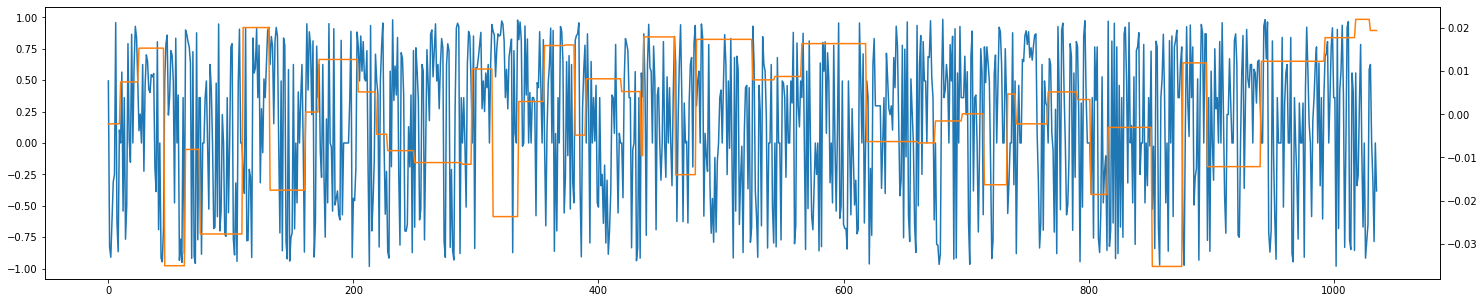

In [168]:
plt.figure(figsize=(25,5))
ax1=merged_data.sentiment_score.plot(label='sentiment score')
ax2=merged_data.SP500.plot(secondary_y=True)
#couldn't figure out how to fix this

In [170]:
print('There seems to be a negative correlation between the sentiment score and the stock market. Meaning when something good was tweeted, the stock market tended to go down and visa verso.')
merged_data.corr()

There seems to be a negative correlation between the sentiment score and the stock market. Meaning when something good was tweeted, the stock market tended to go down and visa verso.


,SP500,sentiment_score
SP500,1.000000,-0.055305
sentiment_score,-0.055305,1.000000


### To find out if Trump's sentiment actually influence the market, I would want to bring in some other stocks/indexes to get a wider representation of the market. I would also probably break it down by hour or even minute to see if specific tweets had an immediate impact on the market.

### I would bring in the data in the same way that I did in this assignment, just with more frequency and from more sources.

### I would likely use a linear regression to determine if there was any correlation between the market and Trump's sentiment analysis.